# Lecture 8: Linear Regresion and the Bias-Variance Trade-Off
***

<img src="figs/targetsBannerTry.png",width=1100,height=50>

**Reminder**:  Go to the botttom of the notebook and shift-enter the helper functions.
***

***

<br>
<br>

### Problem 1: Interpreting Regression Models 
***

*This problem was taken from **Introduction to Statistical Learning** by James et. al. *

Suppose we have a data set with five features, $x_1 = GPA$, $x_2 =  IQ$, $x_3 = Gender$ (0 for Male, 1 for Female), $x_4 = GPA \times IQ$, and $x_5 = GPA \times Gender$.  The response is starting salary after graduation (in thousands of dollars).  Suppose we use least squares to fit the model, and get the following estimates of the regression parameters; $\hat{w}_0 = 50$,  $\hat{w}_1 = 20$,  $\hat{w}_2 = 0.07$,  $\hat{w}_3 = 35$,  $\hat{w}_4 = 0.01$, and $\hat{w}_5 = -10$.  

<br>

**Q**: Predict the salary of a female with IQ of 110 and a GPA of 4.0. 

<br>

**Q**: Which of the following statements are correct, and why? 

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough. 

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough. 

<br>

<!---
[[Problem 1 Answers]](#prob1ans)
-->

<br>

### Problem 2: Deriving Features Using Residual Plots
*** 

For problems with few features, it's often useful to make plots of the residual ${\bf r} = \hat{{\bf y}} - {\bf y}$ to try to diagnose missing features that might be helpful to add.  Consider the following linear regression problem, where a linear model is in fact a good model for the data.  


RSS =  0.556460558416


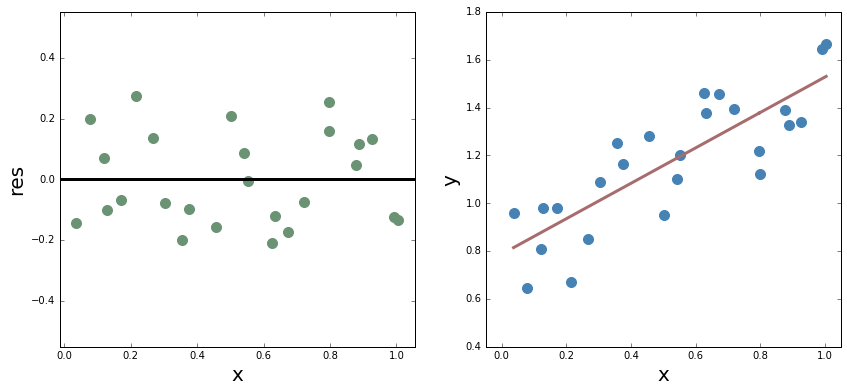

In [4]:
X, y = puzzleData(puzzle=0, n=25)
residualPuzzle1D(X, y, hint=True)

**Q**: What feature of the residual plot indicates to you that the linear model fits the data well?  

Now consider the following residual plot.  What feature seems to be missing?  If you have an idea, try adding it to the input features and checking the result.  You can hopefully do this without seeing the actual data, but if not, set $\texttt{hint=True}$ in the parameters. 

RSS =  0.165274811282


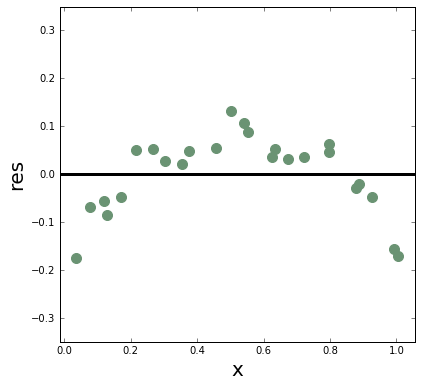

In [5]:
x, y = puzzleData(puzzle=1, n=25)
X = x
# Add a new feature as a column of X 
# with X = np.column_stack((x, #TODO))
residualPuzzle1D(X, y, hint=False)

**Q**: Now see if you can figure out the missing features for this data. 

RSS =  32.803419118


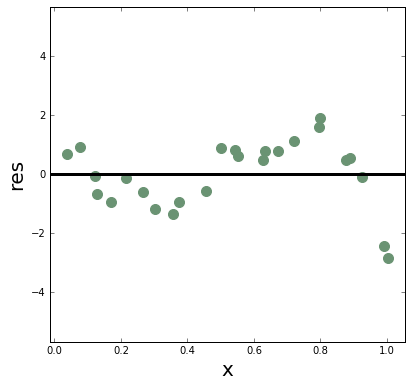

In [6]:
x, y = puzzleData(puzzle=2, n=25)
X = x
# Add a new feature as a column of X 
# with X = np.column_stack((x, #TODO))
residualPuzzle1D(X, y, hint=False)

<br><br>

### Problem 3: Multiple Linear Regression on Advertising Data 
***

In this problem you will perform linear and multiple linear regression on a real-world data set describing the effect of advertisement spending on the sales of a product.  First we need to load the data. 

In [ ]:
import numpy as np 
D = np.genfromtxt('data/Advertising.csv', delimiter=',')
X, y = D[:,:3], D[:,3]

Each row in the data matrix $X$ contains advertising budgets for a particular market. The ﬁrst through third columns report advertising budgets for TV, Radio, and Newspaper, respectively, in units of thousands of dollars.  The entries of $y$ give the product sales for each market (in thousands of products sold). 


We’ll now use linear and multiple linear regression to attempt to determine what (if any) eﬀect advertising has on product sales. We’ll start by looking at the relationship between the sales numbers and each of the advertisement mediums separately. Then we’ll look at the relationship between sales and all of the advertisement mediums together.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regrTV = LinearRegression()
regrTV.fit(X[:,0].reshape(-1,1), y)
print "sales = ", regrTV.intercept_, " + ", regrTV.coef_[0], " x TV"

regrRadio = LinearRegression()
regrRadio.fit(X[:,1].reshape(-1,1), y)
print "sales = ", regrRadio.intercept_, " + ", regrRadio.coef_[0], " x Radio"

regrNews = LinearRegression()
regrNews.fit(X[:,2].reshape(-1,1), y)
print "sales = ", regrNews.intercept_, " + ", regrNews.coef_[0], " x Newspaper"

You can visualize the three linear regressions by running the code below. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
axes = [ax1, ax2, ax3]
regrs = [regrTV, regrRadio, regrNews]
features = ["TV", "Radio", "Newspaper"]

ax1.set_ylim(0,30)
ax1.set_ylabel("Sales")
for jj, (ax, regr, feat) in enumerate(zip(axes, regrs, features)):
    ax.grid(True)
    ax.set_xlim(0, np.max(X[:,jj]))
    ax.set_xlabel(feat, fontsize=20)
    ax.scatter(X[:,jj], y, s=25, color=mycolors["blue"], alpha=0.7)
    x = np.linspace(0, np.max(X[:,jj]))
    ax.plot(x, regr.intercept_ + regr.coef_[0]*x, lw=3, color=mycolors["blue"])

**Q**: Based on the individual linear regressions, what is the relationship between TV, Radio, Newspaper and Sales?  Based on the individual analyses, does it seem likely that advertising in each media market contributes to increased sales of the product?   

<br>

Now we'll fit a multiple linear regression model for the three features simultaneously. 

In [ ]:
regrAll = LinearRegression()
regrAll.fit(X, y)
print "sales = ", regrAll.intercept_, " + ", regrAll.coef_[0], " x TV + ", \
       regrAll.coef_[1], " x Radio + ", \
       regrAll.coef_[2], " x Newspaper"

**Q**: Based on the multiple linear regression model, what is the relationship between TV, Radio, and Newspaper advertising and Sales?  Based on the coefficients in your model, does it appear that all of the advertising mediums contribute significantly to an increase in products sold? 

**Q**:  It appears that something fishy might be going on here.  Let's look at the correlation between each of the features and sales. 

In [ ]:
print np.corrcoef(X.T, y)

Based on the correlation of the features, can you explain the disparity in model coefficients in the single linear regression and multiple linear regression settings? 

<br>

<!---
[[Problem 2 Answers]](#prob2ans)
-->

<br>


<br>
<br>

### Problem 4: The Bias-Variance Trade-Off 
***

**Q**: The following graphic (from Scott Fortman-Roe's [*Understanding the Bias-Variance Trade-Off*](http://scott.fortmann-roe.com/docs/BiasVariance.html)) makes an analogy between target shooting and models of varying bias/variance.  Which target corresponds to each of the four possible combinations of high/low bias and high/low variance?  

<img style="float:center;width:500px;margin-right:300" src="figs/targetsSquareNo.jpg">


**Q**:  Consider the K-Nearest Neighbor models shown below corresponding to $K=1$ and $K=15$, respectively.  Discuss the effect of $K$ on the bias and variance of the KNN model.  


K = 1             |  K = 15
:-------------------------:|:-------------------------:
![](figs/hastieKNN1.png)  |  ![](figs/hastieKNN15.png)

***

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

<a id='prob1ans'></a>


### Problem 1: Interpreting Regression Models 
***

*This problem was taken from **Introduction to Statistical Learning** by James et. al. *

Suppose we have a data set with five features, $x_1 = GPA$, $x_2 =  IQ$, $x_3 = Gender$ (0 for Male, 1 for Female), $x_4 = GPA \times IQ$, and $x_5 = GPA \times Gender$.  The response is starting salary after graduation (in thousands of dollars).  Suppose we use least squares to fit the model, and get the following estimates of the regression parameters; $\hat{w}_0 = 50$,  $\hat{w}_1 = 20$,  $\hat{w}_2 = 0.07$,  $\hat{w}_3 = 35$,  $\hat{w}_4 = 0.01$, and $\hat{w}_5 = -10$.  

<br>

**Q**: Predict the salary of a female with IQ of 110 and a GPA of 4.0. 

<br>

**A**: We have 

$$
y = 50 + 20(4.0) + 0.07(110) + 35(1) + 0.01(4.0 \times 110) - 10(4.0 \times 1) = 137.1 \textrm{ thousands of dollars}
$$


<br>

**Q**: Which of the following statements are correct, and why? 

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough. 

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.

**A**:  It will help to see the model written out with the variable names.  We have 

$$
y = 50 + 20\times \textrm{ GPA} + 0.07\textrm{ IQ} + 35\textrm{ Gender} + 0.01\textrm{ GPA} \times \textrm{ IQ} - 10\textrm{ GPA} \times \textrm{ Gender} 
$$

The correct answer is **iii.** 

Notice that if IQ and GPA are fixed then the terms that depend on Gender are $35\textrm{ Gender}$ and $-10\textrm{ GPA} \times \textrm{Gender}$.  If the fixed value of GPA is greater than $3.5$ then the added quantities become negative meaning that females would earn less on average than males.  On the other hand if GPA is less than $3.5$ then the combined sum is positive and females will earn more on average. 

<a id='prob2ans'></a>

### Problem 3: Multiple Linear Regression on Advertising Data 
***

In this problem you will perform linear and multiple linear regression on a real-world data set describing the effect of advertisement spending on the sales of a product.  First we need to load the data. 

In [ ]:
import numpy as np 
D = np.genfromtxt('data/Advertising.csv', delimiter=',')
X, y = D[:,:3], D[:,3]

Each row in the data matrix $X$ contains advertising budgets for a particular market. The ﬁrst through third columns report advertising budgets for TV, Radio, and Newspaper, respectively, in units of thousands of dollars.  The entries of $y$ give the product sales for each market (in thousands of products sold). 


We’ll now use linear and multiple linear regression to attempt to determine what (if any) eﬀect advertising has on product sales. We’ll start by looking at the relationship between the sales numbers and each of the advertisement mediums separately. Then we’ll look at the relationship between sales and all of the advertisement mediums together.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regrTV = LinearRegression()
regrTV.fit(X[:,0].reshape(-1,1), y)
print "sales = ", regrTV.intercept_, " + ", regrTV.coef_[0], " x TV"

regrRadio = LinearRegression()
regrRadio.fit(X[:,1].reshape(-1,1), y)
print "sales = ", regrRadio.intercept_, " + ", regrRadio.coef_[0], " x Radio"

regrNews = LinearRegression()
regrNews.fit(X[:,2].reshape(-1,1), y)
print "sales = ", regrNews.intercept_, " + ", regrNews.coef_[0], " x Newspaper"

You can visualize the three linear regressions by running the code below. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
axes = [ax1, ax2, ax3]
regrs = [regrTV, regrRadio, regrNews]
features = ["TV", "Radio", "Newspaper"]

ax1.set_ylim(0,30)
ax1.set_ylabel("Sales")
for jj, (ax, regr, feat) in enumerate(zip(axes, regrs, features)):
    ax.grid(True)
    ax.set_xlim(0, np.max(X[:,jj]))
    ax.set_xlabel(feat, fontsize=20)
    ax.scatter(X[:,jj], y, s=25, color=mycolors["blue"], alpha=0.7)
    x = np.linspace(0, np.max(X[:,jj]))
    ax.plot(x, regr.intercept_ + regr.coef_[0]*x, lw=3, color=mycolors["blue"])

**Q**: Based on the individual linear regressions, what is the relationship between TV, Radio, Newspaper and Sales?  Based on the individual analyses, does it seem likely that advertising in each media market contributes to increased sales of the product?   

**A**: From the computations above, we have the following forms of the single linear regression models 


\begin{array}{rcl}
\textrm{sales} &=&  7.03259354913  +  0.047536640433  \times \textrm{ TV} \\
\textrm{sales} &=&  9.31163809516  +  0.202495783392  \times \textrm{ Radio} \\ 
\textrm{sales} &=&  12.3514070693  +  0.054693098472  \times \textrm{ Newspaper}
\end{array}

The single linear regression models seem to show a net positive contribution to the advertising in each market on sales.  But we should be skeptical of reading too much into single linear regression... 

<br>

Now we'll fit a multiple linear regression model for the three features simultaneously. 

In [ ]:
regrAll = LinearRegression()
regrAll.fit(X, y)
print "sales = ", regrAll.intercept_, " + ", regrAll.coef_[0], " x TV + ", \
       regrAll.coef_[1], " x Radio + ", \
       regrAll.coef_[2], " x Newspaper"

**Q**: Based on the multiple linear regression model, what is the relationship between TV, Radio, and Newspaper advertising and Sales?  Based on the coefficients in your model, does it appear that all of the advertising mediums contribute significantly to an increase in products sold? 

**A**: From above, we have 

$$
\textrm{sales} =  2.93888936946  +  0.0457646454554  \times \textrm{ TV} +  0.188530016918  \times \textrm{ Radio} +  -0.00103749304248  \times \textrm{ Newspaper}
$$

Interpreting the regression coefficients it appears that TV and Radio have a significant effect on product sales.  The regression model also appears to indicate that Newspaper has a *negative* effect on product sales.  This seems a little ridiculous and we should probably be skeptical of this interpretation. 

**Q**:  It appears that something fishy might be going on here.  Let's look at the correlation between each of the features and sales. 

In [ ]:
print np.corrcoef(X.T, y)

Based on the correlation of the features, can you explain the disparity in model coefficients in the single linear regression and multiple linear regression settings? 

**A**: Looking at the $(2,3)-$entry in the correlation matrix it appears that Radio and Newspaper advertising budgets are significantly correlated.  This could potentially happen if companies tend to decide to invest in Radio advertising in the same cities that they invest in Newspaper advertising.  Since the two features are correlated they can act as surrogates for one another in the regression model.  The unintuitive coefficients in the multilinear regression model above are probably due to the regression model giving lots of weight to Radio (because in a sense it represents both Radio and Newspaper budgets) and then downplaying the Newspaper contribution (because it's contribution is accounted for in the Radio budget).

<a id='prob3ans'></a>


<br>
<br>

### Problem 3: The Bias-Variance Trade-Off 
***

**Q**: The following graphic (from Scott Fortman-Roe's [*Understanding the Bias-Variance Trade-Off*](http://scott.fortmann-roe.com/docs/BiasVariance.html)) makes an analogy between target shooting and models of varying bias/variance.  Which target corresponds to each of the four possible combinations of high/low bias and high/low variance?  

<img style="float:center;width:500px;margin-right:300" src="figs/targetsSquareNo.jpg">

**A**: The target in the (1,1)-position represents a method with low bias **and** low variance.  It is low bias because it is shooting at the center of the target (i.e. can capture the ground truth well) and low variance because the shots make a tight pattern.  

The target in the (1,2)-position represents a method with low bias and high variance.  It is low bias because it generally is shooting right at the bullseye but high variance because the shot pattern is all over the place. 

The target in the (2,1)-position represents a method with high bias and low variance.  The shots are all significantly off center (i.e. can't capture the ground truth well) and low variance because the pattern is tight. 

The target in the (2,2)-position is high bias and high variance.  It is high bias because it is shooting off-center of the target and high variance because the shot pattern is spread out. 

**Q**:  Consider the K-Nearest Neighbor models shown below corresponding to $K=1$ and $K=15$, respectively.  Discuss the effect of $K$ on the bias and variance of the KNN model.  


K = 1             |  K = 15
:-------------------------:|:-------------------------:
![](figs/hastieKNN1.png)  |  ![](figs/hastieKNN15.png)

**A**: For small $K$ in $KNN$ the bias will be low (can accurately classify nearly any labeling of points) but the variance will be high (classifier is very sensitive to the training data). 

On the other hand as $K$ increases to large values the bias will go up (decision boundaries become much smoother) but the variance will go down (not nearly as sensitive to the specific location of the training data). 

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### Helper Functions
***

In [3]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}


def puzzleData(puzzle, n=25):
    
    if puzzle < 0 or puzzle > 2: 
        print "Puzzles must be numbered 0-2.  Defaulting to 0."
        puzzle = 0
    
    np.random.seed(1237)
    
    X = np.linspace(0,1,n) + .05 * np.random.rand(n)
    
    if puzzle == 0: 
       return  X, 0.5 + 0.75 * X + .5*np.random.rand(25)
    elif puzzle == 1: 
       return  X, 0.25 - X + X*X + .1*np.random.rand(25)
    elif puzzle == 2: 
       return  X, 2*(3*(2*x-1.2)**3 + 2*(2*x-1.2)**2 -(2*x-1.2)) + 1.5*np.random.rand(25)




def residualPuzzle1D(X, y, hint=False):
    regr = LinearRegression()
    if len(X.shape) == 1:
        X = X.reshape(-1,1)
    regr.fit(X, y)
    yhat = regr.intercept_ * np.ones(y.shape)
    for ii, coef in enumerate(regr.coef_):
        yhat += coef*X[:,ii]
        
    res = yhat - y 
    
    
    fig = plt.figure(figsize=(14,6))
    ax1 = fig.add_subplot(121)
    ax1.scatter(X[:,0], res, color=mycolors["green"], s=100)
    rmax = np.max(abs(res))
    xmin = np.min(X[:,0])
    xmax = np.max(X[:,0])
    ax1.set_xlim([xmin-.05, xmax+.05])
    ax1.set_ylim([-2*rmax, 2*rmax])
    ax1.plot([-.5,1.5], [0,0], color="black", lw=3)
    ax1.set_xlabel(r"x", fontsize=20)
    ax1.set_ylabel(r"res", fontsize=20)
    
    if hint: 
        ax2 = fig.add_subplot(122)
        ax2.scatter(X[:,0], y, color=mycolors["blue"], s=100)
        ax2.plot(X[:,0], yhat, color=mycolors["red"], lw=3)
        ax2.set_xlim([-0.05,1.05])
        ax2.set_xlabel("x", fontsize=20)
        ax2.set_ylabel("y", fontsize=20)
        
    
    print "RSS = ", np.linalg.norm(res)**2


from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")